# Curve fitting

Docs:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import pandas as pd

## Data creation

Data is in a file `data.txt` 


## Data reading

In [12]:
data = pd.read_csv("data.txt", 
                   header = None, 
                   names = ["t", "v"], 
                   sep = " ")
data.head()

t          v
0  1  3682292.0
1  2  3279070.0
2  3  3095424.0
3  4  2886581.0
4  5  2768292.0

<IPython.core.display.Javascript object>


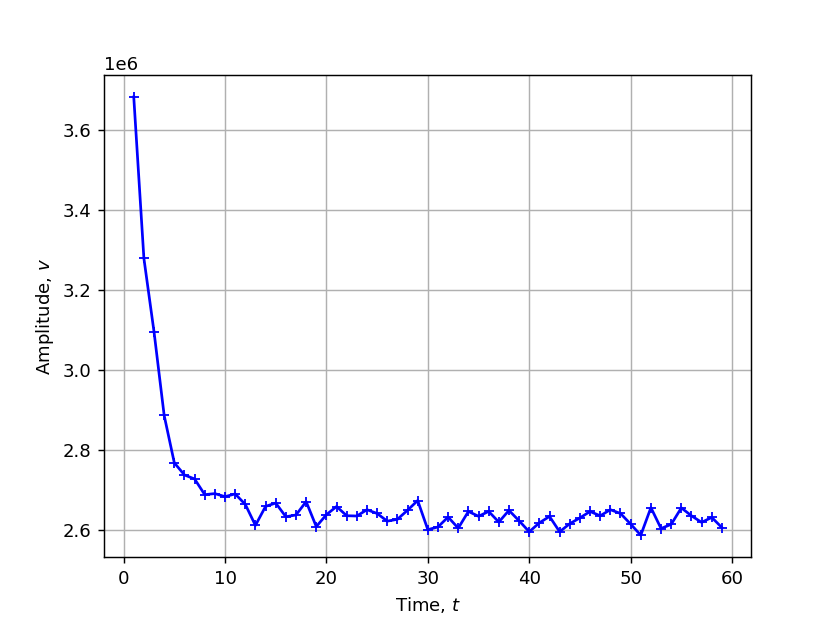

In [18]:
plt.figure()
plt.plot(data.t, data.v, "+b-")
plt.grid()
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $v$")
#plt.yscale("log")
plt.show()

## Data fitting



In [42]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
x = data.t.values.astype(np.float64)
y = data.v.values.astype(np.float64)

popt, pcov = optimize.curve_fit(func, x, y, maxfev = 10000, p0 = [1.e6,1., 0.])


In [43]:
# Solution
popt

array([1.62642267e+06, 4.46425597e-01, 2.63389988e+06])

<IPython.core.display.Javascript object>


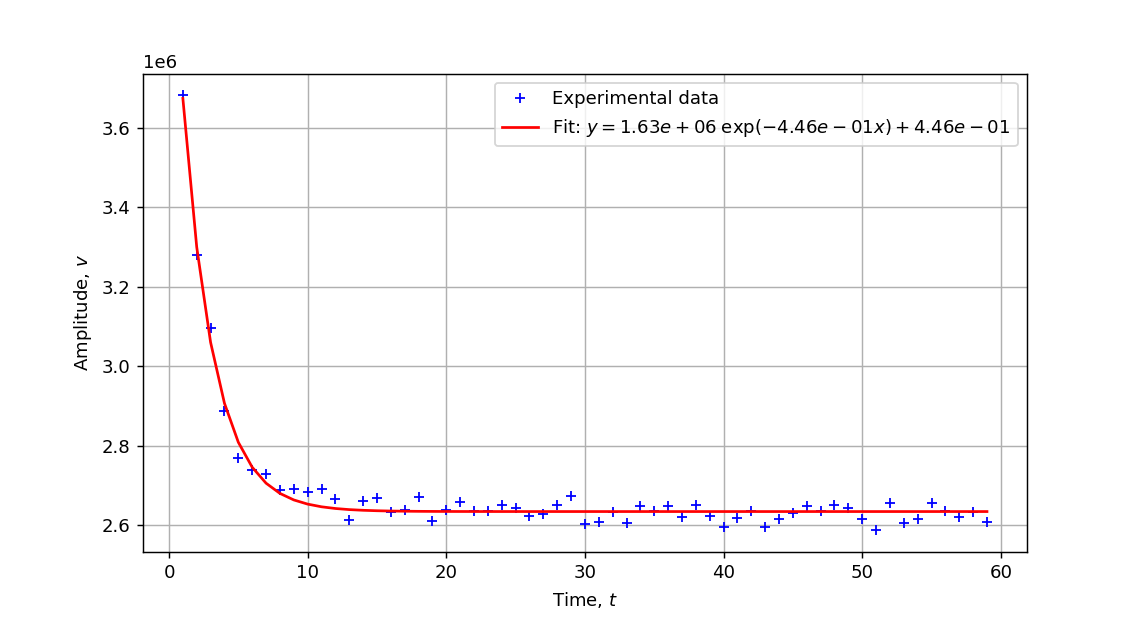

In [44]:
plt.figure()
plt.plot(x, y, "+b", label = "Experimental data")
plt.plot(x, func(x, *popt), "r-", label = "Fit: $y = {0:.2e} \\; \\exp(-{1:.2e}  x ) + {1:.2e}$".format(*popt))
plt.legend()
plt.grid()
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $v$")
#plt.yscale("log")
plt.show()